Using post captions ot classify marketing strategy

In [38]:
import matplotlib.pyplot as plt 
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import re
import sklearn as sk
from wordcloud import WordCloud
from wordcloud import STOPWORDS


In [39]:
df = pd.read_csv("cleaned_instagram_data.csv")

TF-IDF Vectorization (Best for keyword-based clustering)

In [44]:
# in this case we are only classifying, so we dont need the punctuation and emojis, just keep texts
tokenizer = RegexpTokenizer(r'\w+')
tf_idf_vect = sk.feature_extraction.text.TfidfVectorizer(lowercase=True,
                        stop_words="english",
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# after looking at wordcloud again, i feel should remove all the useless stuff like themepark etc
remove_uss = lambda text: re.sub(r'universalstudiossingapore', '', text, flags=re.IGNORECASE)
X = df["caption"].apply(remove_uss)
X = tf_idf_vect.fit_transform(X)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [45]:
num_clusters = 5
kmeans = sk.cluster.KMeans(n_clusters=num_clusters, random_state=42)
df["cluster_tfidf"] = kmeans.fit_predict(X)

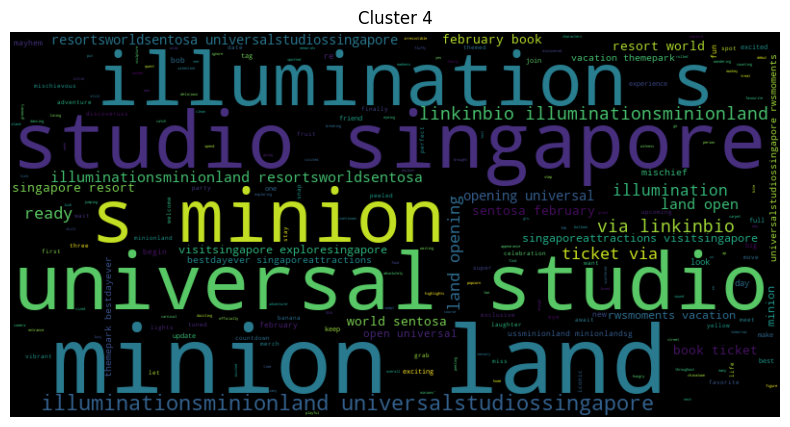

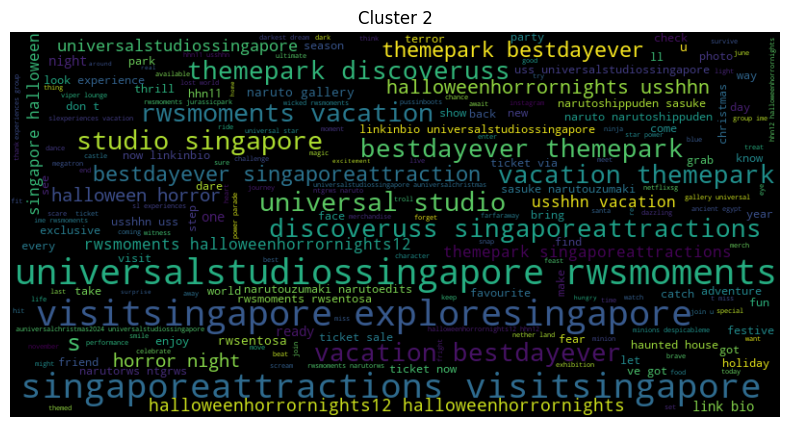

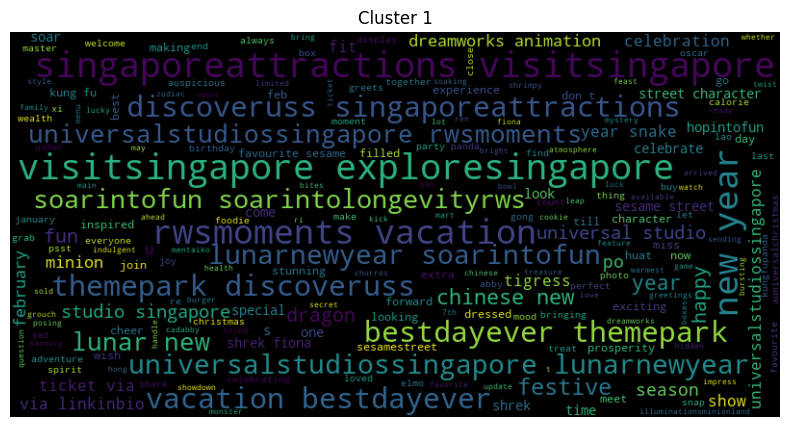

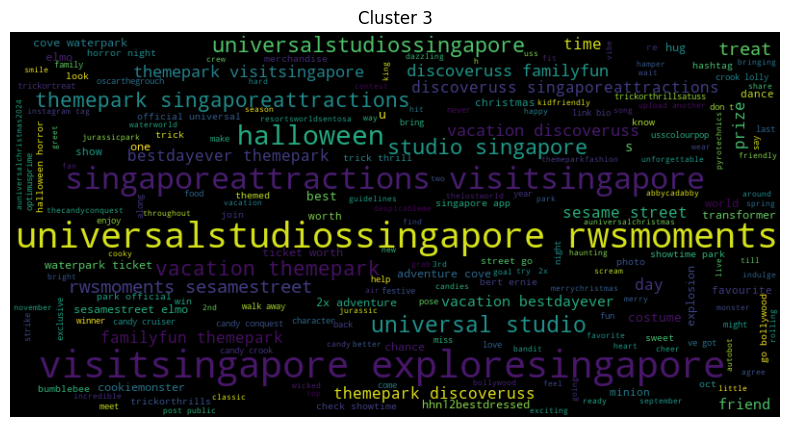

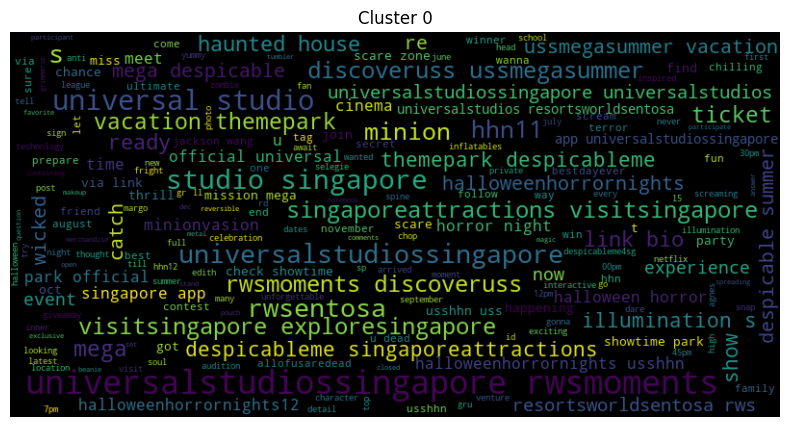

In [46]:
for i in df["cluster_tfidf"].unique():
    cluster_text = " ".join(df[df["cluster_tfidf"] == i]["caption"])
    wordcloud = WordCloud(width=800, height=400).generate(cluster_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {i}")
    plt.show()


In [47]:
from collections import Counter
import numpy as np

def get_top_words(tfidf_matrix, feature_names, cluster_labels, num_words=10):
    for i in np.unique(cluster_labels):
        cluster_indices = np.where(cluster_labels == i)[0]
        cluster_tfidf = tfidf_matrix[cluster_indices].toarray().sum(axis=0)
        top_words = [feature_names[j] for j in cluster_tfidf.argsort()[-num_words:][::-1]]
        print(f"Cluster {i}: {', '.join(top_words)}\n")

feature_names = tf_idf_vect.get_feature_names_out()
get_top_words(X, feature_names, kmeans.labels_)


Cluster 0: mega, despicable, ussmegasummer, s, 4, summer, hhn11, rwsentosa, 2, illumination

Cluster 1: year, new, lunarnewyear, soarintofun, soarintolongevityrws, lunar, chinese, bestdayever, singaporeattractions, vacation

Cluster 2: rwsmoments, singaporeattractions, themepark, visitsingapore, exploresingapore, vacation, bestdayever, discoveruss, universal, singapore

Cluster 3: sesamestreet, exploresingapore, visitsingapore, familyfun, themepark, elmo, rwsmoments, vacation, halloween, discoveruss

Cluster 4: minion, land, illuminationsminionland, illumination, 14, s, february, 2025, opening, singapore



In [49]:
df['cluster'] = kmeans.labels_  # Assign cluster labels to DataFrame
print(df['cluster'].value_counts())  # Count posts per cluster

cluster
2    310
3     53
1     38
4     35
0     33
Name: count, dtype: int64
